In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from nilearn.input_data import NiftiLabelsMasker
import matplotlib.pyplot as plt

In [23]:
ex_data = '/Users/Katie/Dropbox/Projects/physics-retrieval/data/101-session-0_fci-0_mcf.nii.gz'
ex_parc = '/Users/Katie/Dropbox/Projects/physics-retrieval/data/101-session-0_fci-0_shen2015.nii.gz'
confounds = '/Users/Katie/Dropbox/Projects/physics-retrieval/data/101-session-0_fci-2_mcf.nii.gz.par'

In [24]:
masker = NiftiLabelsMasker(ex_parc, background_label=0, standardize=True, detrend=True,t_r=3.)
signal = masker.fit_transform(ex_data, confounds=confounds)

In [40]:
j = np.arange(signal.shape[0])
index = j.tolist()

In [82]:
signals = pd.DataFrame(index=j, data=signal)
corrmat = np.corrcoef(signal.T)

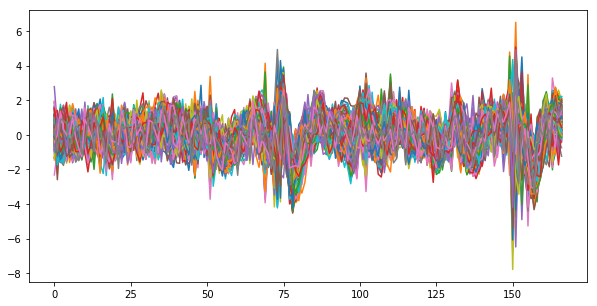

In [66]:
fig,ax = plt.subplots(figsize=(10,5))
k = plt.plot(signals)
fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/timeseries.png', dpi=300)

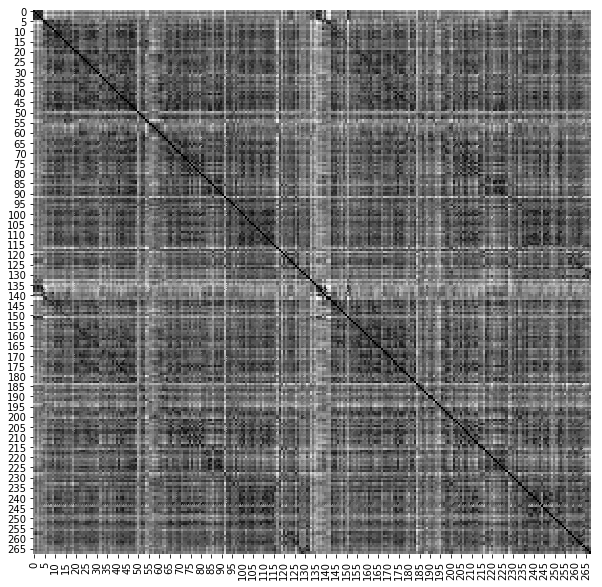

In [91]:
fig,ax = plt.subplots(figsize=(10,10))
k = sns.heatmap(corrmat, cbar=False, cmap='Greys')
fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/corrmat.png', dpi=300)

In [81]:
import bct 

In [84]:
bct.threshold_proportional(corrmat, 0.1)

array([[0.        , 0.        , 0.83103829, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.83103829, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.77747079,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.77747079, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

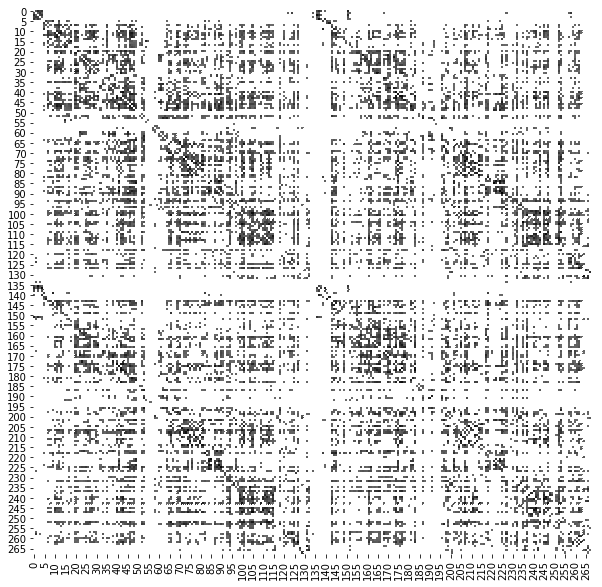

In [92]:
fig,ax = plt.subplots(figsize=(10,10))
k = sns.heatmap(bct.threshold_proportional(corrmat, 0.21), cbar=False, cmap='Greys')
fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/upper_corrmat.png', dpi=300)

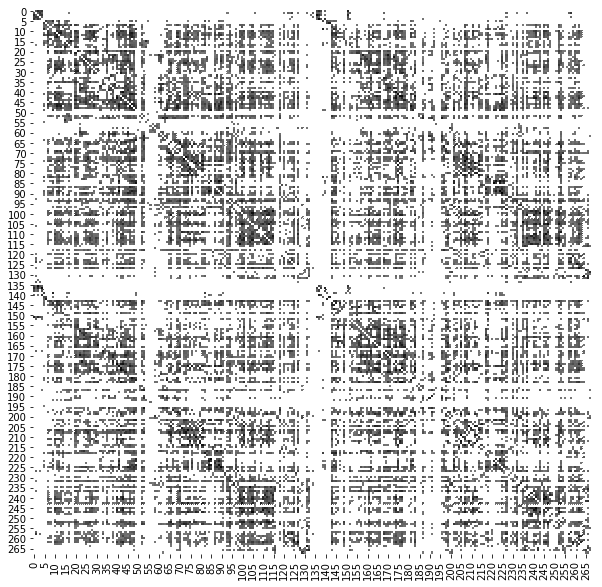

In [93]:
fig,ax = plt.subplots(figsize=(10,10))
k = sns.heatmap(bct.threshold_proportional(corrmat, 0.31), cbar=False, cmap='Greys')
fig.savefig('/Users/Katie/Dropbox/Projects/physics-retrieval/figures/lower_corrmat.png', dpi=300)